### **List of Group Members:**
**Student_ID Student_Name**

200001A ABC

200002B DEF

---

Consider the planet data stored in the `planet.csv` file. These data give values of three features for 101 exoplanets discovered up to October 2002. We are interested in clustering the exoplanets based on these features. Note that an exoplanet is a planet located outside the solar system. You may read about them at https://en.wikipedia.org/wiki/Exoplanet. The features recorded are - `Mass` (in Jupiter mass), `Period` (in Earth days), and `Eccentricity`.

a)  Perform an exploratory analysis of the data. Be sure to examine the univariate distributions of the variables and their bivariate relationships using appropriate plots and summary statistics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Load your dataset
data = pd.read_csv(r'D:\uni\s7\ML\planet.csv')
print(data.head())

    Mass  Period  Eccentricity
0  0.120   4.950          0.00
1  0.197   3.971          0.00
2  0.210  44.280          0.34
3  0.220  75.800          0.28
4  0.230   6.403          0.08


In [7]:
print(data.describe())

             Mass       Period  Eccentricity
count  101.000000   101.000000    101.000000
mean     3.327287   666.531252      0.281548
std      3.680601   873.749838      0.210943
min      0.050000     2.985000      0.000000
25%      0.930000    44.280000      0.100000
50%      1.760000   337.110000      0.270000
75%      4.140000  1089.000000      0.410000
max     17.500000  5360.000000      0.927000


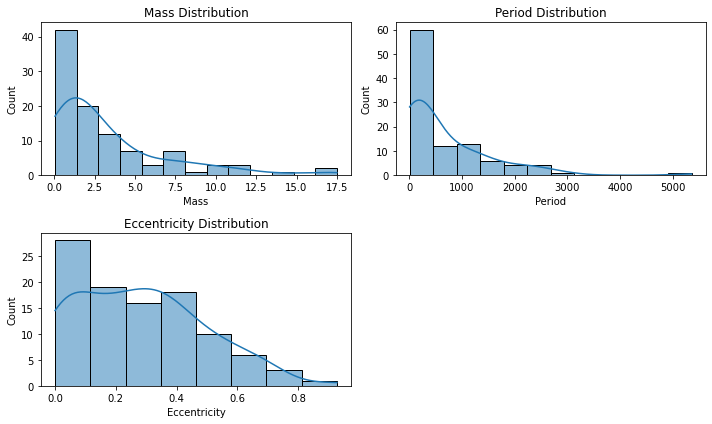

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(x='Mass', data=data, kde=True)
plt.title('Mass Distribution')

plt.subplot(2, 2, 2)
sns.histplot(x='Period', data=data, kde=True)
plt.title('Period Distribution')

plt.subplot(2, 2, 3)
sns.histplot(x='Eccentricity', data=data, kde=True)
plt.title('Eccentricity Distribution')

plt.tight_layout()
plt.show()

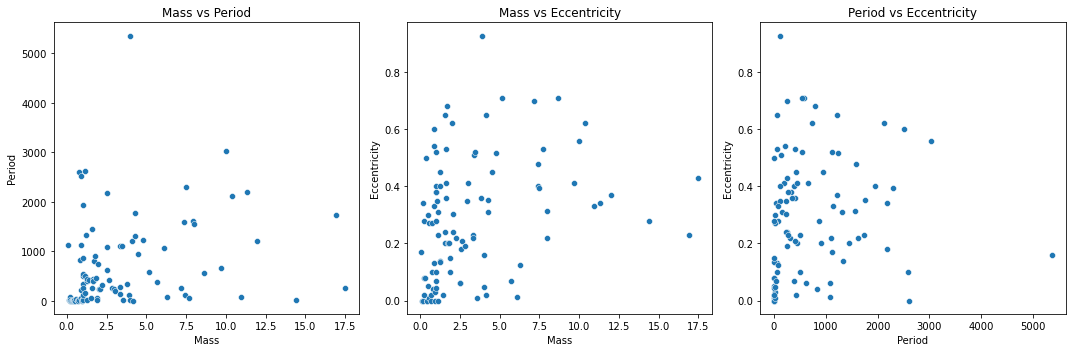

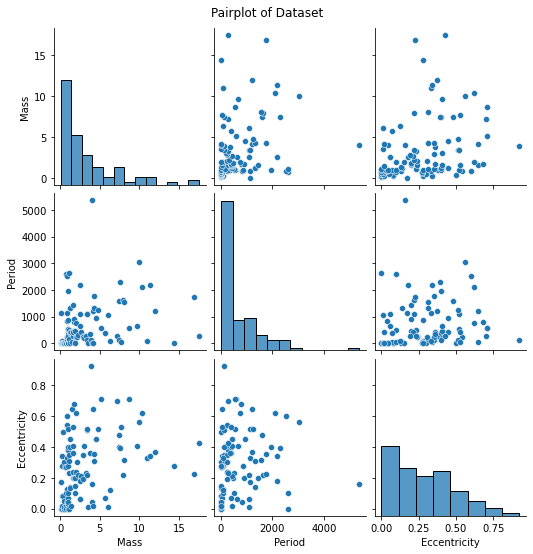

Summary statistics of the dataset:
             Mass       Period  Eccentricity
count  101.000000   101.000000    101.000000
mean     3.327287   666.531252      0.281548
std      3.680601   873.749838      0.210943
min      0.050000     2.985000      0.000000
25%      0.930000    44.280000      0.100000
50%      1.760000   337.110000      0.270000
75%      4.140000  1089.000000      0.410000
max     17.500000  5360.000000      0.927000


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the dataset

# Bivariate relationships using scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Mass', y='Period', data=data)
plt.title('Mass vs Period')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Mass', y='Eccentricity', data=data)
plt.title('Mass vs Eccentricity')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Period', y='Eccentricity', data=data)
plt.title('Period vs Eccentricity')

plt.tight_layout()
plt.show()

# Bivariate relationships using pairplot
sns.pairplot(data)
plt.suptitle('Pairplot of Dataset', y=1.02)
plt.show()

# Summary statistics
print("Summary statistics of the dataset:")
print(data.describe())


b)  Do you think standardizing the variables before clustering would be a good idea? Justify your answer.

Equal Weighting: Clustering algorithms such as K-means use distance-based metrics to calculate cluster centroids and assign data points to clusters. If the variables have different scales or units, variables with larger scales may dominate the clustering process. Standardizing the variables brings them to a common scale, ensuring that each variable contributes equally to the clustering process.

Improved Interpretability: Standardizing variables can make the interpretation of cluster centroids more straightforward. Without standardization, it's challenging to compare the magnitude of coefficients across variables. Standardization ensures that the coefficients reflect the relative importance of variables in defining cluster centroids.

Algorithm Sensitivity: Some clustering algorithms are sensitive to the scale of variables. For example, K-means clustering is sensitive to the scale of variables because it uses Euclidean distance. Standardizing variables mitigates this sensitivity and leads to more stable and reliable clustering results.

Better Convergence: Standardizing variables can help clustering algorithms converge faster and more reliably. It can prevent issues such as numerical instability and slow convergence that may arise when variables have different scales.

c)  Would you use metric-based or correlation-based distance to cluster the exoplanets? Justify your answer.

Correlation-based Distance:

Justification: Correlation-based distances, such as Pearson correlation or Spearman correlation, measure the similarity between variables based on their linear or monotonic relationships, respectively. These distances are useful when the magnitude or units of variables are not important, and the focus is on capturing the patterns of association between variables. If the goal is to identify clusters of exoplanets based on their relationships with each other rather than their absolute values, correlation-based distances can be a suitable choice.

d)  Regardless of your answers in (b) and (c), standardize the variables and hierarchically cluster the exoplanets using complete linkage and Euclidean distance. Display the results using a dendogram. Cut the dendogram at a height that results in three distinct clusters. Summarize the cluster-specific means of the three variables (on the original scale) in a tabular form. Also, make pairwise scatterplots of the three variables (on the original scale) and show the three clusters in different colors.

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [10]:
data_std = (data - data.mean()) / data.std()

In [13]:
Z = linkage(data_std, method='complete', metric='euclidean')

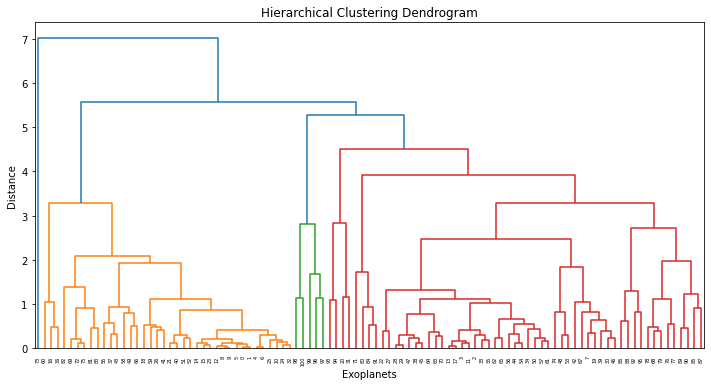

In [14]:
# Display the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Exoplanets')
plt.ylabel('Distance')
plt.show()

In [15]:
# Cut the dendrogram to obtain three distinct clusters
clusters = fcluster(Z, 3, criterion='maxclust')

In [16]:
# Add cluster labels to the DataFrame
data['Cluster'] = clusters


In [17]:
cluster_means = data.groupby('Cluster').mean().reset_index()
print("Cluster-specific means of the three variables:")
print(cluster_means)

Cluster-specific means of the three variables:
   Cluster      Mass       Period  Eccentricity
0        1  1.703316   488.747927      0.070771
1        2  4.311774   699.794116      0.412694
2        3  4.000000  5360.000000      0.160000


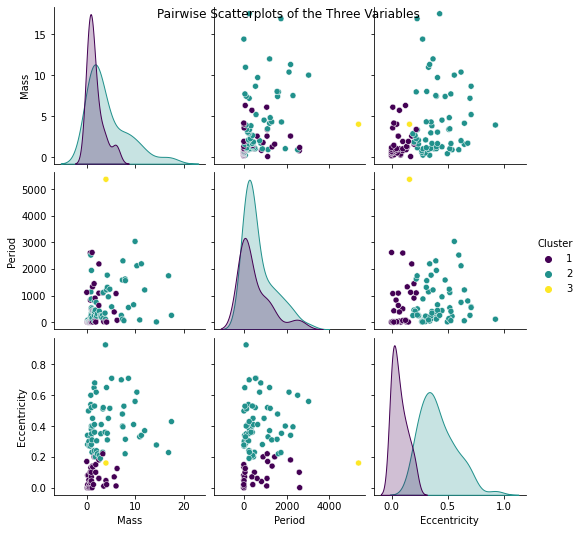

In [18]:
# Make pairwise scatterplots of the three variables and show the three clusters in different colors
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Scatterplots of the Three Variables')
plt.show()

e)  Repeat (d) using $K$-means clustering with $K=3$. (Of course, you won't have a dendogram in this case.) Compare the conclusions with (d).

In [20]:
from sklearn.cluster import KMeans

In [21]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_std)

KMeans(n_clusters=3, random_state=42)

In [22]:
# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_


In [23]:
# Summarize the cluster-specific means of the three variables in a tabular form
cluster_means_kmeans = data.groupby('Cluster').mean().reset_index()
print("Cluster-specific means of the three variables (K-means):")
print(cluster_means_kmeans)

Cluster-specific means of the three variables (K-means):
   Cluster       Mass       Period  Eccentricity
0        0   1.644000   420.610023      0.125987
1        1   3.010000   633.403242      0.500061
2        2  10.567857  1693.172014      0.366500


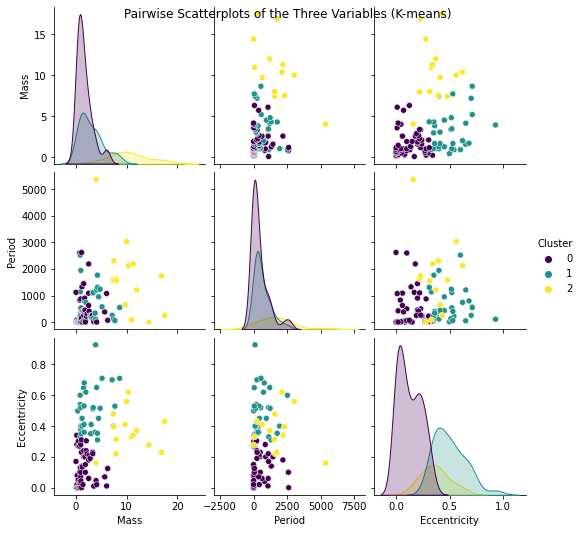

In [24]:
# Make pairwise scatterplots of the three variables and show the three clusters in different colors
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Scatterplots of the Three Variables (K-means)')
plt.show()